In [1]:
# import libraries
import json
import networkx as nx
import numpy as np
import os
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as app
from scipy.stats import pearsonr
import seaborn as sns
import pylab
from scipy.stats import mannwhitneyu
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from itertools import chain
import sys
import inspect

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import newsrc.population as p
import newsrc.model as m
import newsrc.tuning as t


%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

# Tuning: nominated network

## 1. Grid search: crude (400 parameter combinations)

In [2]:
tuning =  t.Tuning()

/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:20: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args)
<ipython-input-2-7e5a03539d76>:1: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  tuning =  t.Tuning()
/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:21: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)


### 1.1. Running

In [162]:
# specify parameter space for grid search
seq = np.arange(0,1,0.05)
result_error, result_child, result_cl, empirical_data = tuning.execute_grid_search(t_range=seq,
                                                                                   i_range=seq,
                                                                                   t=700,
                                                                                   population_name='peer')

thres_PA: 0.0  I_PA: 0.0  error: 0.5084110871529905 |runtime: 7.483298063278198
thres_PA: 0.0  I_PA: 0.05  error: 14.86179356441456 |runtime: 7.417644023895264
thres_PA: 0.0  I_PA: 0.1  error: 35.388982609557694 |runtime: 7.475854873657227
thres_PA: 0.0  I_PA: 0.15000000000000002  error: 37.45259907331395 |runtime: 7.574986934661865
thres_PA: 0.0  I_PA: 0.2  error: 37.365062628904724 |runtime: 7.4269139766693115
thres_PA: 0.0  I_PA: 0.25  error: 37.79815528618851 |runtime: 7.4877519607543945
thres_PA: 0.0  I_PA: 0.30000000000000004  error: 37.884049125185996 |runtime: 7.241864919662476
thres_PA: 0.0  I_PA: 0.35000000000000003  error: 38.08378366860231 |runtime: 7.1888628005981445
thres_PA: 0.0  I_PA: 0.4  error: 38.32950738829518 |runtime: 7.228474855422974
thres_PA: 0.0  I_PA: 0.45  error: 38.49076925732667 |runtime: 7.421626806259155
thres_PA: 0.0  I_PA: 0.5  error: 38.719396048759634 |runtime: 7.412250280380249
thres_PA: 0.0  I_PA: 0.55  error: 39.02729364582931 |runtime: 7.37695002

### 1.2 Results

In [163]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)
errors_df

1,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0,,,,,,,,,,,,,,,,,,,,
0.00,0.508411,14.861794,35.388983,37.452599,37.365063,3.779816e+01,3.788405e+01,3.808378e+01,3.832951e+01,3.849077e+01,3.871940e+01,3.902729e+01,3.896026e+01,39.863711,39.920232,39.650478,39.839258,40.176740,40.938787,41.085610
0.05,0.508411,780.772118,176.283296,60.144447,33.862346,1.554993e+01,1.069895e+01,2.069988e+28,8.858597e+28,3.171348e+28,4.973785e+18,6.306546e+15,3.812740e+04,14.801485,17.604760,19.302124,21.285110,22.267501,25.581312,30.019565
0.10,0.508411,762.410758,812.181390,364.845935,259.068482,1.671990e+02,9.903063e+01,1.331469e+33,2.802205e+27,2.577061e+22,8.670574e+23,6.200965e+14,1.365412e+05,3.854791,3.833286,6.413906,10.381457,12.090890,15.785106,22.075765
0.15,0.508411,2.703089,1219.360982,1012.090763,581.444137,4.839573e+02,1.340796e+29,8.911186e+24,1.641191e+32,5.450878e+26,9.996987e+22,4.910599e+15,1.685922e+05,7.157387,4.035169,3.788872,3.716080,5.051581,8.667692,16.894553
0.20,0.508411,2.726962,294.756738,1712.335155,1219.063777,1.083757e+03,1.913514e+29,9.743659e+28,4.875516e+32,5.814063e+26,1.800204e+24,1.280845e+15,2.811317e+05,20.298620,12.709645,7.920816,7.233748,5.526642,5.097568,13.314944
0.25,0.508411,2.962418,534.410197,1632.119745,1196.071345,3.680135e+07,9.909904e+02,6.961686e+27,1.533187e+25,4.709704e+25,7.300908e+23,2.481050e+15,3.257904e+05,43.199154,36.042240,19.459620,9.922289,11.908525,3.767821,11.805724
0.30,0.508411,2.814490,4.419760,1031.963479,2219.227931,1.833973e+03,1.855096e+25,1.209136e+29,1.576611e+31,1.308413e+30,2.312616e+24,3.448216e+16,2.076269e+06,104.981795,61.755990,36.735374,33.236878,19.119741,10.028862,12.318640
0.35,0.508411,2.450927,3.915203,1489.433651,1331.497456,2.200406e+03,1.470993e+03,1.393013e+03,8.876896e+32,1.905875e+27,4.282116e+24,9.822264e+15,6.633766e+05,135.357222,102.714773,76.023979,46.927296,22.823204,14.426192,14.786486
0.40,0.508411,2.184193,3.000081,1167.613575,1367.639849,2.606341e+03,1.886217e+03,1.224298e+29,1.371747e+03,1.439429e+30,1.189110e+03,7.803560e+16,1.374975e+06,196.072910,145.211717,106.281104,50.329591,57.047509,33.020867,18.746025


Text(0.5, 105.0, 'I PA')

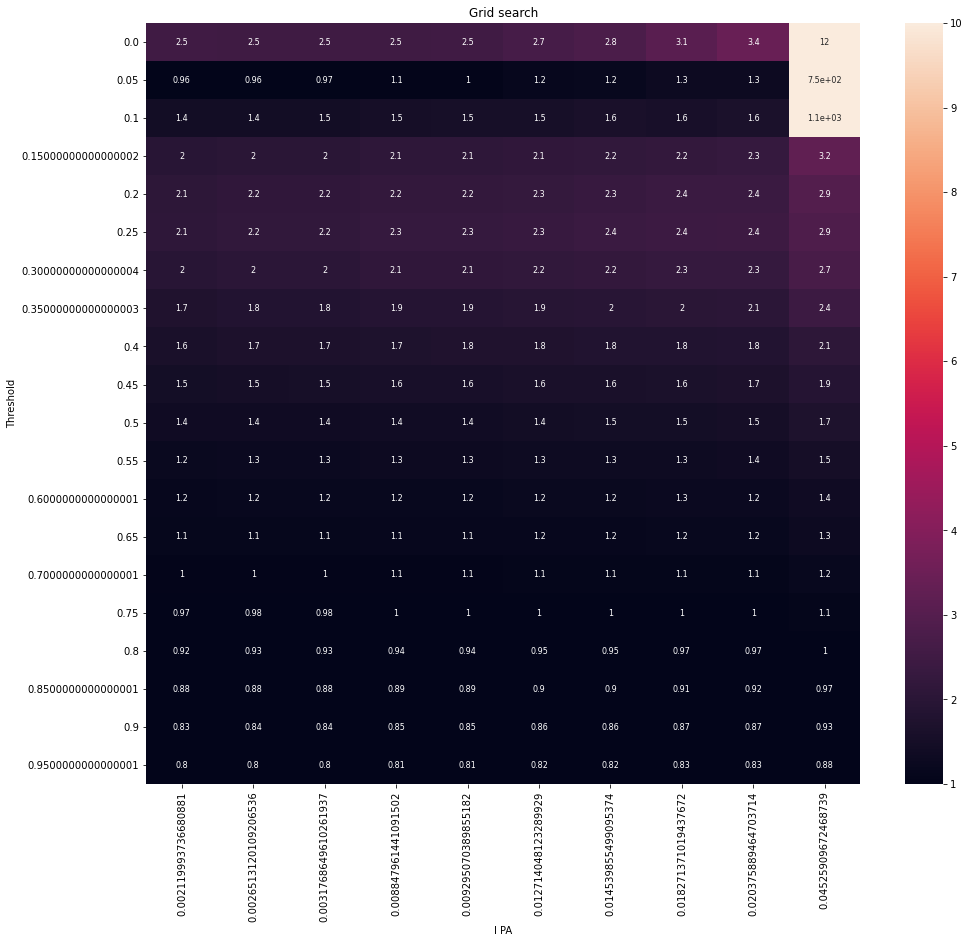

In [182]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=1, vmax=10)
plt.ylabel('Threshold')
plt.xlabel('I PA')








## 2. Grid search: subspace (2000 parameter combinations)

### 2.1. Running

In [3]:
# specify parameter space for grid search
t_seq = np.arange(0.025,1.025,0.025)
i_seq = np.arange(0.001,0.051,0.001)

In [4]:
result_error2, result_child2, result_cl2, empirical_data2 = tuning.execute_grid_search(t_range=t_seq,
                                                                                   i_range=i_seq,
                                                                                   t=700,
                                                                                   population_name='peer')

thres_PA: 0.025  I_PA: 0.001  error: 0.40603820174097716 |runtime: 6.826400995254517
thres_PA: 0.025  I_PA: 0.002  error: 0.42653546811516363 |runtime: 6.355488061904907
thres_PA: 0.025  I_PA: 0.003  error: 0.4116639216108192 |runtime: 6.277004957199097
thres_PA: 0.025  I_PA: 0.004  error: 0.4232975423267632 |runtime: 6.367873191833496
thres_PA: 0.025  I_PA: 0.005  error: 0.42834029923309813 |runtime: 6.24047589302063
thres_PA: 0.025  I_PA: 0.006  error: 0.44411999648385553 |runtime: 6.182927846908569
thres_PA: 0.025  I_PA: 0.007  error: 0.46894367392297126 |runtime: 6.347744941711426
thres_PA: 0.025  I_PA: 0.008  error: 0.48052559029697983 |runtime: 6.186789274215698
thres_PA: 0.025  I_PA: 0.009000000000000001  error: 0.5086135948250905 |runtime: 6.521689176559448
thres_PA: 0.025  I_PA: 0.010000000000000002  error: 0.5338413816046275 |runtime: 6.179764986038208
thres_PA: 0.025  I_PA: 0.011  error: 0.5226224099807634 |runtime: 6.2476208209991455
thres_PA: 0.025  I_PA: 0.012  error: 148

### 2.2 Results

In [167]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.002120,0.002651,0.003177,0.008848,0.009295,0.012714,0.014540,0.018271,0.020376,0.045259
0,,,,,,,,,,
0.00,2.539797,2.510438,2.500280,2.489045,2.536700,2.676316,2.788386,3.086421,3.400125,12.239821
0.05,0.956025,0.960437,0.973326,1.055837,1.047481,1.172631,1.185226,1.293655,1.306408,747.840813
0.10,1.435946,1.448874,1.453578,1.520113,1.530597,1.537863,1.597981,1.585936,1.648045,1059.587032
0.15,1.971367,2.014396,2.016218,2.101467,2.123193,2.137285,2.188399,2.225308,2.277865,3.249793
0.20,2.083141,2.150159,2.157942,2.230263,2.221681,2.263372,2.317777,2.397910,2.391570,2.944419
0.25,2.103707,2.190052,2.195293,2.274951,2.290363,2.319868,2.392335,2.434376,2.449925,2.855098
0.30,1.953384,2.036374,2.046138,2.133579,2.134675,2.174171,2.210736,2.268190,2.275301,2.719406
0.35,1.747795,1.824956,1.829106,1.902618,1.909545,1.940006,1.982909,2.012275,2.052761,2.435332
0.40,1.619023,1.682343,1.691538,1.725022,1.752273,1.763561,1.782745,1.801860,1.808902,2.086742


Text(0.5, 105.0, 'I PA')

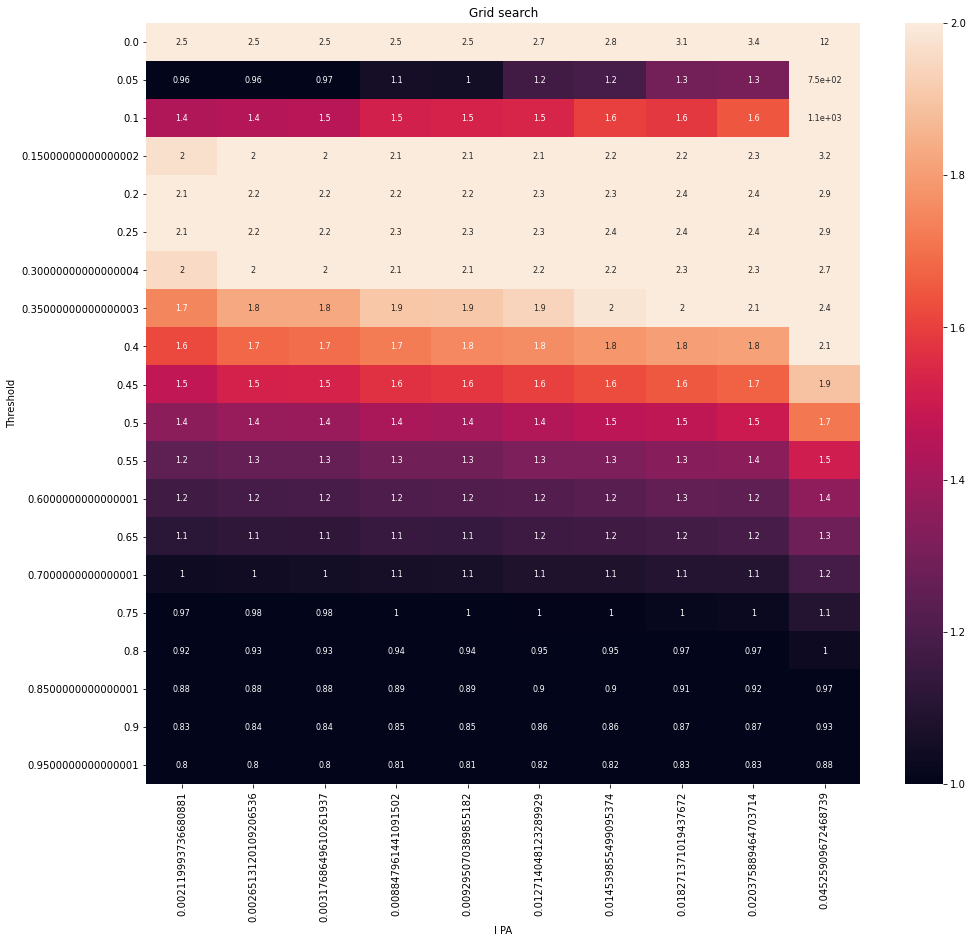

In [168]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 8}, vmin=1, vmax=2)
plt.ylabel('Threshold')
plt.xlabel('I PA')

0      1.438490
1      1.438053
2      1.437615
3      1.437187
4      1.436766
         ...   
695    1.559595
696    1.559595
697    1.559595
698    1.559595
699    1.559595
Length: 700, dtype: float64

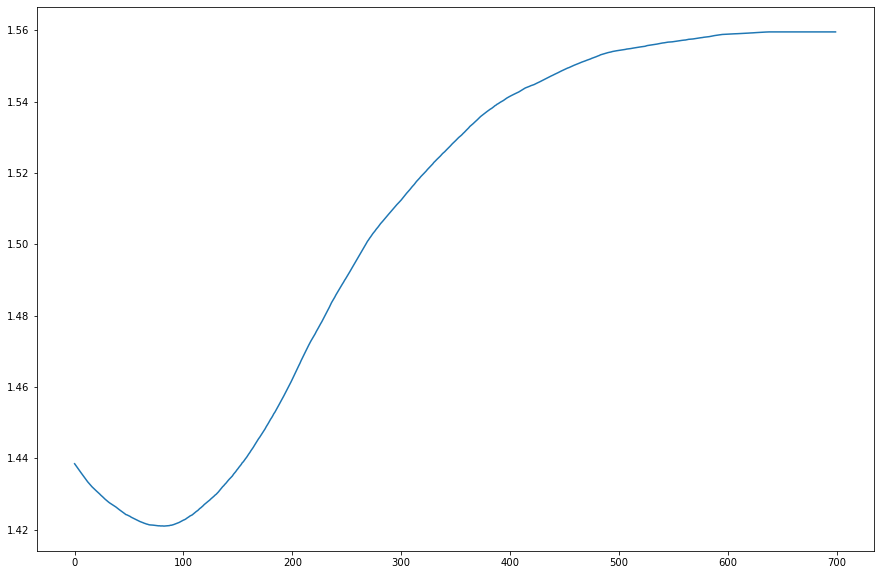

In [169]:
a = pd.DataFrame(result_cl2[11]).mean(axis=1)

a.plot(figsize=((15,10)))
a

In [5]:
sort_errors = result_error2

b=tuple(sort_errors)
b2 = sorted(b, key=lambda x:x[2])
b3  = b2[0:100]
b3



[(1.0, 0.001, 0.09565556402011435),
 (0.9750000000000001, 0.001, 0.0999667607822183),
 (0.9500000000000001, 0.001, 0.10457652036936627),
 (0.925, 0.001, 0.10954698403766418),
 (0.9, 0.001, 0.11512984717922838),
 (0.8750000000000001, 0.001, 0.12157007858141897),
 (0.8500000000000001, 0.001, 0.1290223618518518),
 (1.0, 0.002, 0.13242383768553373),
 (0.8250000000000001, 0.001, 0.1371433041959985),
 (0.9750000000000001, 0.002, 0.13865431423150734),
 (0.9500000000000001, 0.002, 0.1450857028702926),
 (0.8, 0.001, 0.14577986497549406),
 (1.0, 0.003, 0.14590705152520003),
 (1.0, 0.004, 0.14644660086912345),
 (1.0, 0.005, 0.14698311822504911),
 (1.0, 0.007, 0.14739414927603747),
 (1.0, 0.006, 0.14824485723761988),
 (1.0, 0.008, 0.14850739729689288),
 (1.0, 0.009000000000000001, 0.14977588680547582),
 (1.0, 0.011, 0.15046999605824485),
 (1.0, 0.013000000000000001, 0.1505052337175314),
 (1.0, 0.010000000000000002, 0.15122136588342405),
 (0.925, 0.002, 0.1519588777496632),
 (1.0, 0.012, 0.15205382

In [6]:
import csv

with open('../output/opt_pars_nominated.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in b3:
        csv_out.writerow(row)














